# Multiple_Linear_Regression_Bike_Sharing_Assignment

    -- Submitted by Suprabhat Paul

#### Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario.In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

***The company wants to know:***

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

***Goal:***
- Develop a model to find the variables which are significant the demand for shared bikes with the available independent variables.
- It will be used by the management to understand and manipulate the business strategy to meet the demand levels and meet the customer's expectations.

## Step1: Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

## Step2: Reading Dataset and Understanding Data

In [2]:
#Read the csv file using pandas
bikeSharingDataFrame = pd.read_csv('day.csv')
bikeSharingDataFrame.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Checking it's Shape
bikeSharingDataFrame.shape

(730, 16)

In [4]:
#check dataframe for null and datatype 
bikeSharingDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
#check the details of data
bikeSharingDataFrame.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
#check the columns of data frame
bikeSharingDataFrame.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [7]:
#check the size of data being provided
bikeSharingDataFrame.size

11680

In [8]:
#check the datatypes of various column in dataSet
bikeSharingDataFrame.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [9]:
#check the axes of data
bikeSharingDataFrame.axes

[RangeIndex(start=0, stop=730, step=1),
 Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
        'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
        'casual', 'registered', 'cnt'],
       dtype='object')]

In [10]:
#check the dimensions of data
bikeSharingDataFrame.ndim

2

In [11]:
#check the values of data
bikeSharingDataFrame.values

array([[1, '01-01-2018', 1, ..., 331, 654, 985],
       [2, '02-01-2018', 1, ..., 131, 670, 801],
       [3, '03-01-2018', 1, ..., 120, 1229, 1349],
       ...,
       [728, '29-12-2019', 1, ..., 159, 1182, 1341],
       [729, '30-12-2019', 1, ..., 364, 1432, 1796],
       [730, '31-12-2019', 1, ..., 439, 2290, 2729]], dtype=object)

## Step3: Cleaning Data

### 3.1 Drop columns that are not useful for analysis

- `instant` is just a row instance identifier.
- `dteday` is removed as we have some of date features like `mnth` and `year` and `weekday` already in other columns and also for this analysis we will not consider day to day trend in demand for bikes.
- `casual` and `registered` variables are not available at the time of prediction and also these describe the target variable `cnt` in a very trivial way `target = casual + registered`, which leads to data leakage.

In [12]:
# Checking if instant column has unique entries, if yes, then will convert it to index
bikeSharingDataFrame['instant'].nunique()

730

In [13]:
# Yes, it is index column which has nothing to do with target
bikeSharingDataFrame.drop(['instant'], axis = 1, inplace = True)
bikeSharingDataFrame.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [14]:
#Before dropping date, let us introduce a days_old variable which indicates how old is the business
bikeSharingDataFrame['days_old'] = (pd.to_datetime(bikeSharingDataFrame['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days
bikeSharingDataFrame.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,days_old
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4


In [15]:
# Dropping dteday as we have already have month and weekday columns to work with
bikeSharingDataFrame.drop(['dteday'], axis = 1, inplace = True)
bikeSharingDataFrame.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,days_old
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4


In [16]:
# Dropping casual and registered columnsa as as we have cnt column which is sum of the both that is the target column

bikeSharingDataFrame.drop(['casual'], axis = 1, inplace = True)
bikeSharingDataFrame.drop(['registered'], axis = 1, inplace = True)

In [17]:
#Inspect data frame after dropping
bikeSharingDataFrame.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


In [18]:
bikeSharingDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  days_old    730 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 74.3 KB


### 3.2 Handle Missing values

In [19]:
#Print null counts by column
bikeSharingDataFrame.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
days_old      0
dtype: int64

#### _`Inference`_: There are no null values.

### 3.3 Handle Outliers

In [20]:
### Handle Outliers
bikeSharingDataFrame.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'days_old'],
      dtype='object')

In [21]:
#Checking the number of unique values in all columns
bikeSharingDataFrame.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
days_old      730
dtype: int64

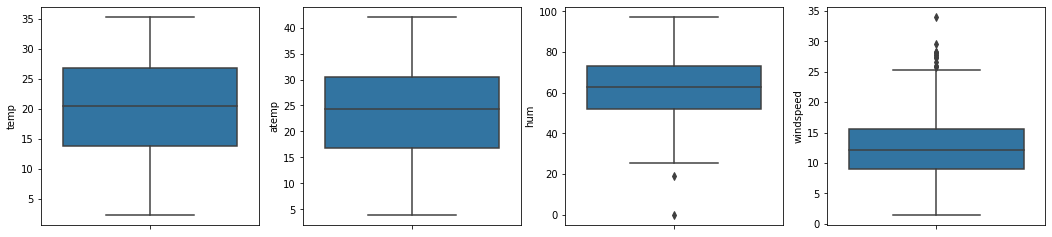

In [22]:
# Draw box plots for indepent variables with continuous values i.e temp, atemp, hum, windspeed
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=bikeSharingDataFrame)
    i+=1

#### From these plots, we can see there are no outliers to be handled. We are good with not having any outliers in the data set

## 4. EDA

#### 4.1 Convert season and  weathersit to categorical types

In [23]:
bikeSharingDataFrame.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

bikeSharingDataFrame.weathersit.replace({1:'Good',2:'Average', 3:'Bad', 4:'Very Bad'},inplace = True)

bikeSharingDataFrame.mnth = bikeSharingDataFrame.mnth.replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'})

bikeSharingDataFrame.weekday = bikeSharingDataFrame.weekday.replace({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'})
bikeSharingDataFrame.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,spring,0,Jan,0,Sat,0,Average,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,Jan,0,Sun,0,Average,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,Jan,0,Mon,1,Good,8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,0,Jan,0,Tue,1,Good,8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,0,Jan,0,Wed,1,Good,9.305237,11.46350,43.6957,12.522300,1600,4


#### 4.2 Draw pair Plots to check the linear relationship

<Figure size 1080x2160 with 0 Axes>

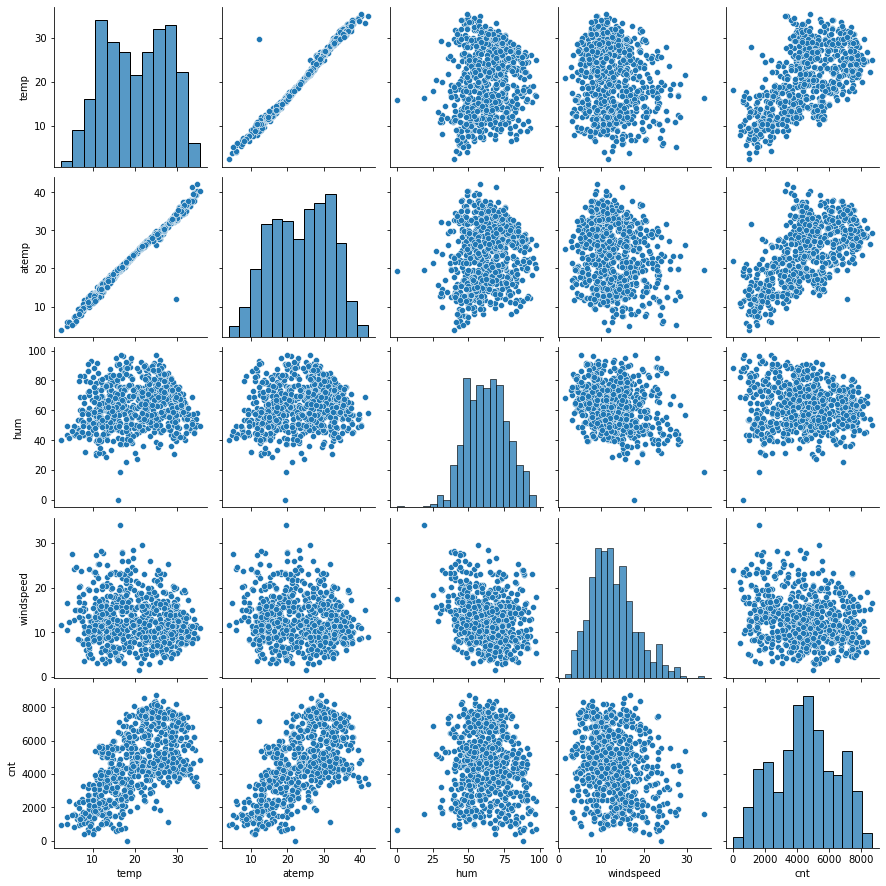

In [24]:
#Draw pairplots for continuous numeric variables using seaborn
plt.figure(figsize = (15,30))
sns.pairplot(data=bikeSharingDataFrame,vars=['temp', 'atemp', 'hum','windspeed','cnt'])
plt.show()

##### _`Inference`_: 
- Looks like the temp and atemp has the highest corelation with the target variable cnt
- temp and atemp are highly co-related with each other
##### As seen from the correlation map, output variable has a linear relationship with variables like temp, atemp. 

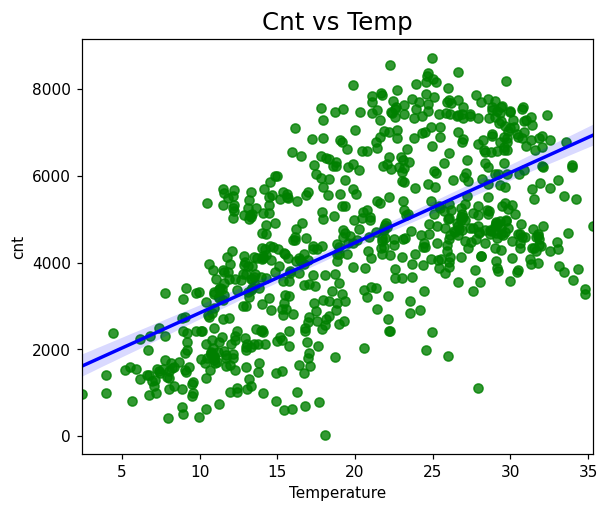

In [25]:
#correlation of temp to count of bikes
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Temp",fontsize=16)
sns.regplot(data=bikeSharingDataFrame,y="cnt",x="temp", scatter_kws={"color": "green"}, line_kws={"color": "blue"})
plt.xlabel("Temperature")
plt.show()

#### _`Inference`_:
- Demand for bikes is positively correlated to temp.
- We can see that cnt is linearly increasing with temp indicating linear relation.

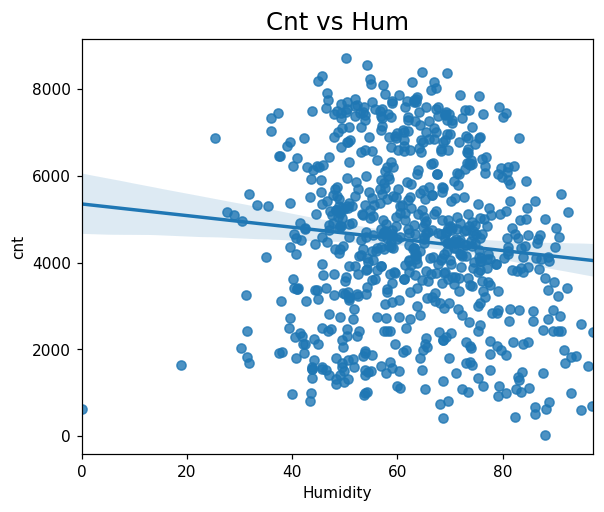

In [26]:
#correlation of Humidity to count of bikes
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Hum",fontsize=16)
sns.regplot(data=bikeSharingDataFrame,y="cnt",x="hum")
plt.xlabel("Humidity")
plt.show()

#### _`Inference`_:
- Hum is values are more scattered around.
- Although we can see cnt decreasing with increase in humidity.

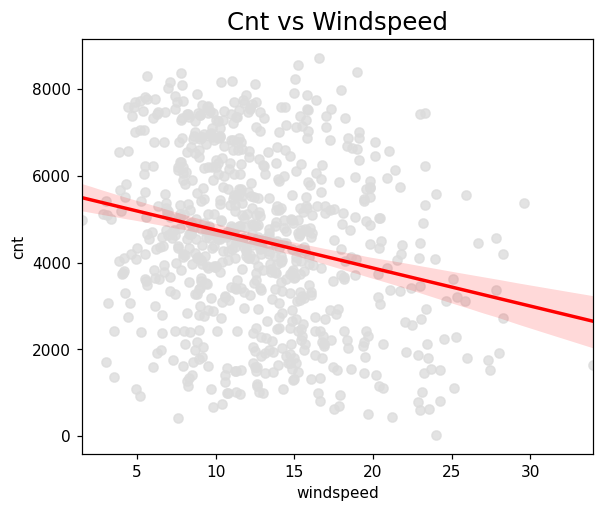

In [27]:
#correlation of windspeed to count of bikes
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Windspeed",fontsize=16)
sns.regplot(data=bikeSharingDataFrame,y="cnt",x="windspeed", scatter_kws={"color": "#dcdcdc"}, line_kws={"color": "red"})
plt.show()

#### _`Inference`_:
- Windspeed is values are more scattered around.
- Although we can see cnt decreasing with increase in windspeed.

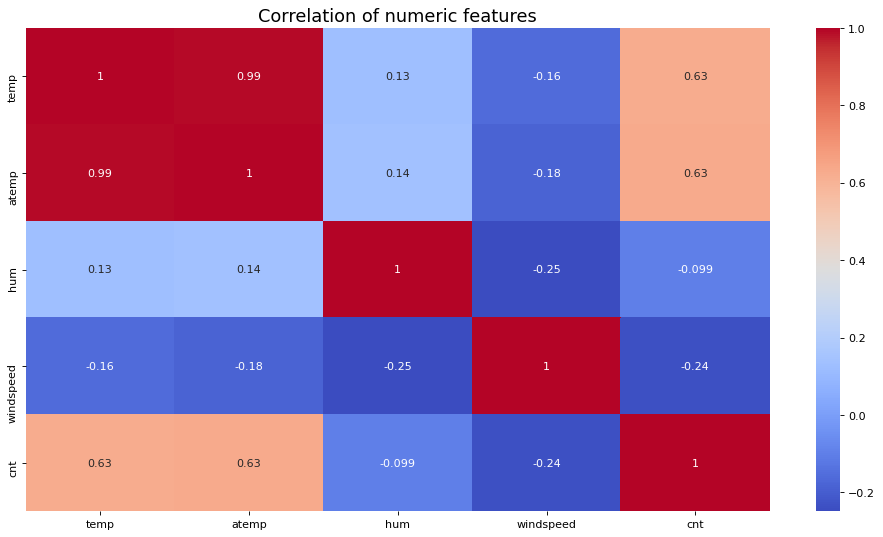

In [28]:
#heatmap on correlation of numeric features
num_features = ["temp","atemp","hum","windspeed","cnt"]
plt.figure(figsize=(15,8),dpi=80)
plt.title("Correlation of numeric features",fontsize=16)
sns.heatmap(bikeSharingDataFrame[num_features].corr(),annot= True,cmap="coolwarm")
plt.show()

#### `_Inference`_:
- Temp and Atemp are highly correlated, we can take an action to remove one of them, but lets keep them for further analysis.
- Temp and Atemp also have high correlation with cnt variable.

#### 4.3 Visualising the Data to Find the Correlation between the Numerical Variable

<Figure size 1440x1080 with 0 Axes>

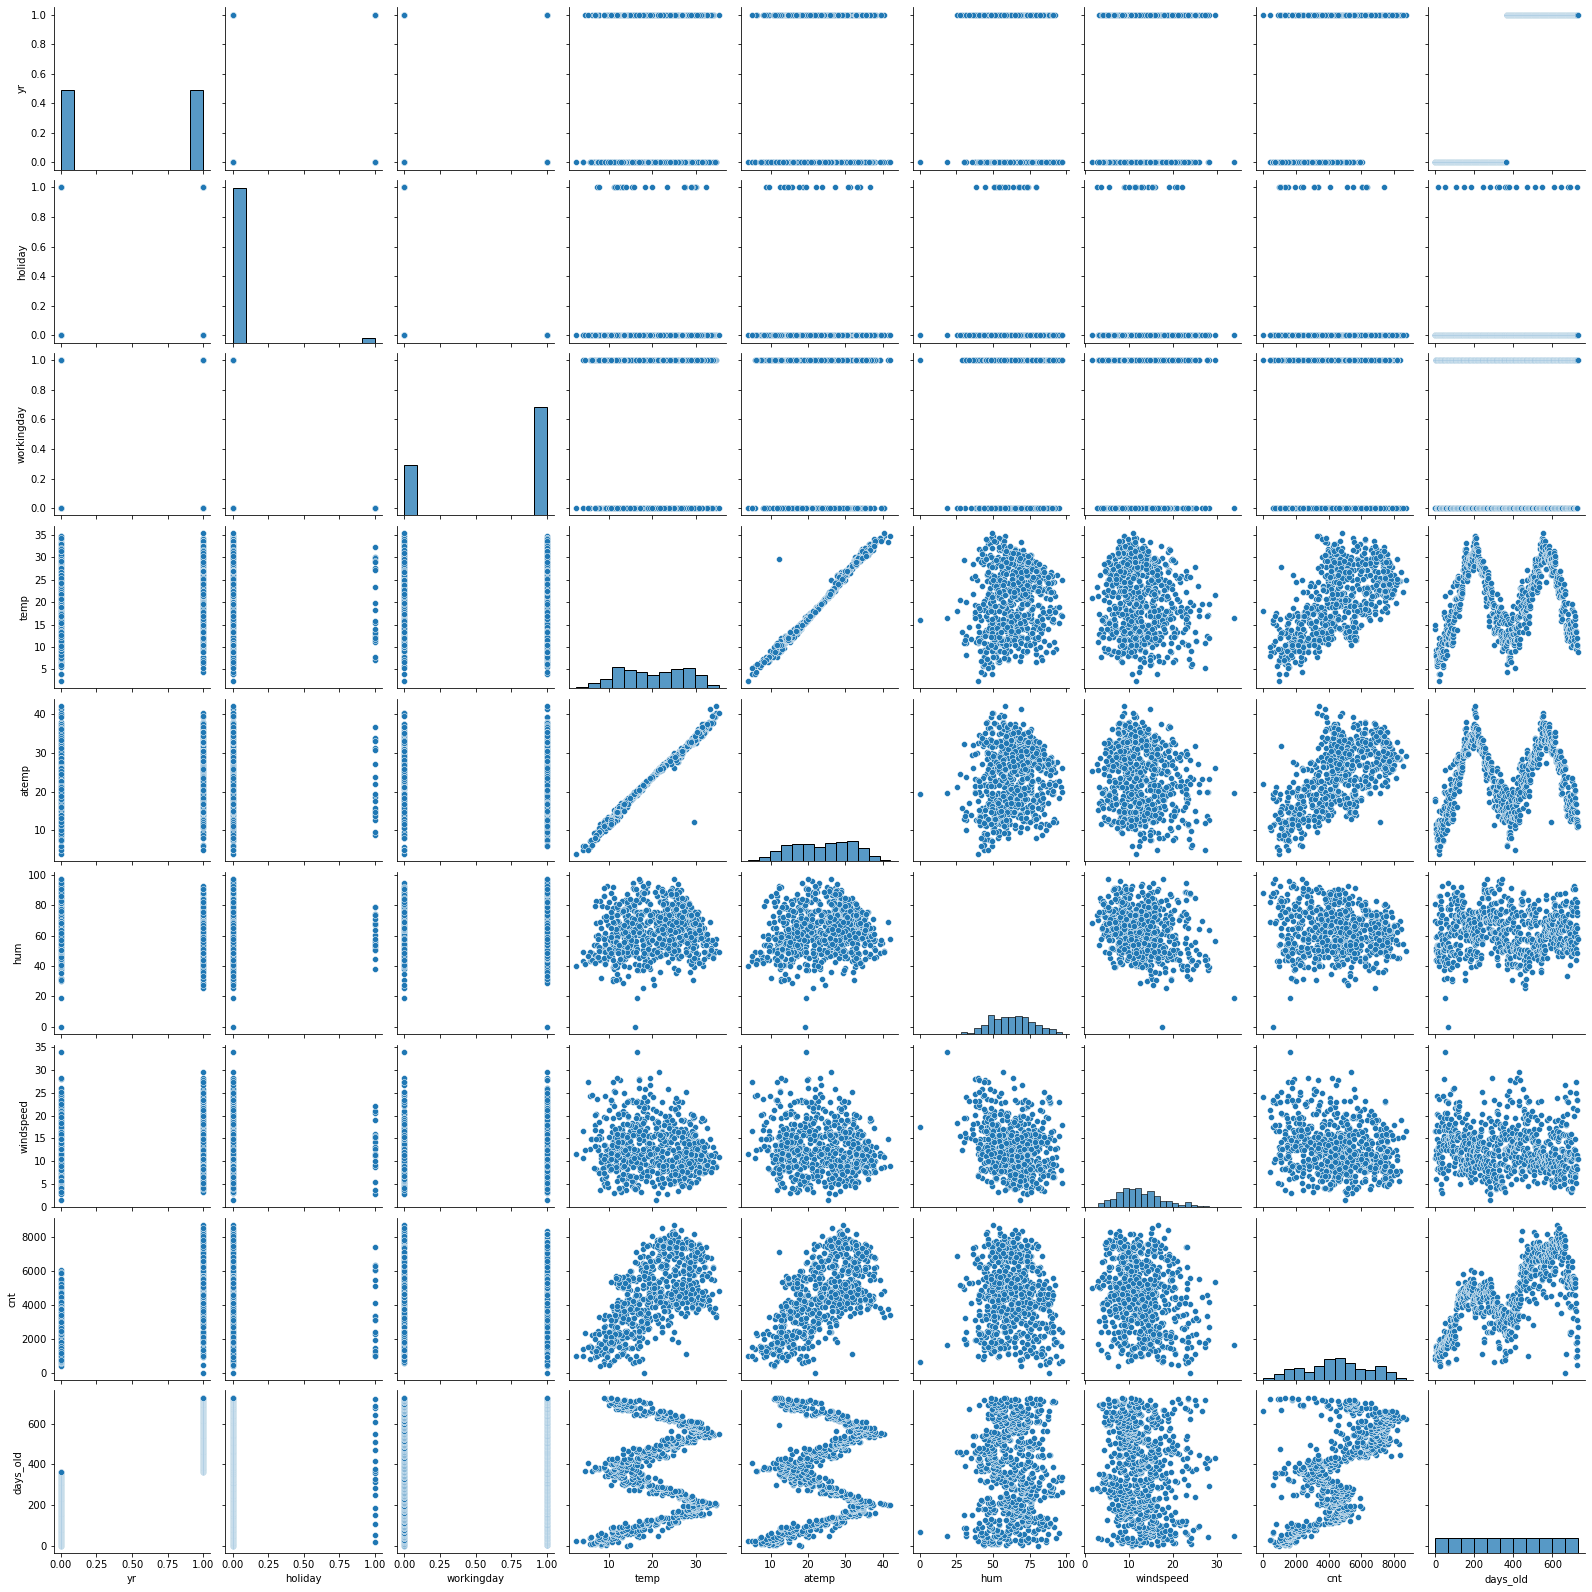

In [29]:
plt.figure(figsize=(20,15))
sns.pairplot(bikeSharingDataFrame)
plt.show()

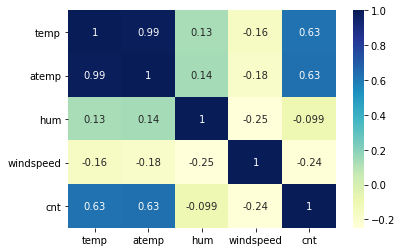

In [30]:
# Checking continuous variables relationship with each other
sns.heatmap(bikeSharingDataFrame[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='YlGnBu', annot = True)
plt.show()

###### Here we see that temp and atemp has correlation more than .99 means almost 1 (highly correlated) and atemp seems to be derived from temp so atemp field can be dropped here only

##### 4.4 Draw Heatmap of correlation between variables

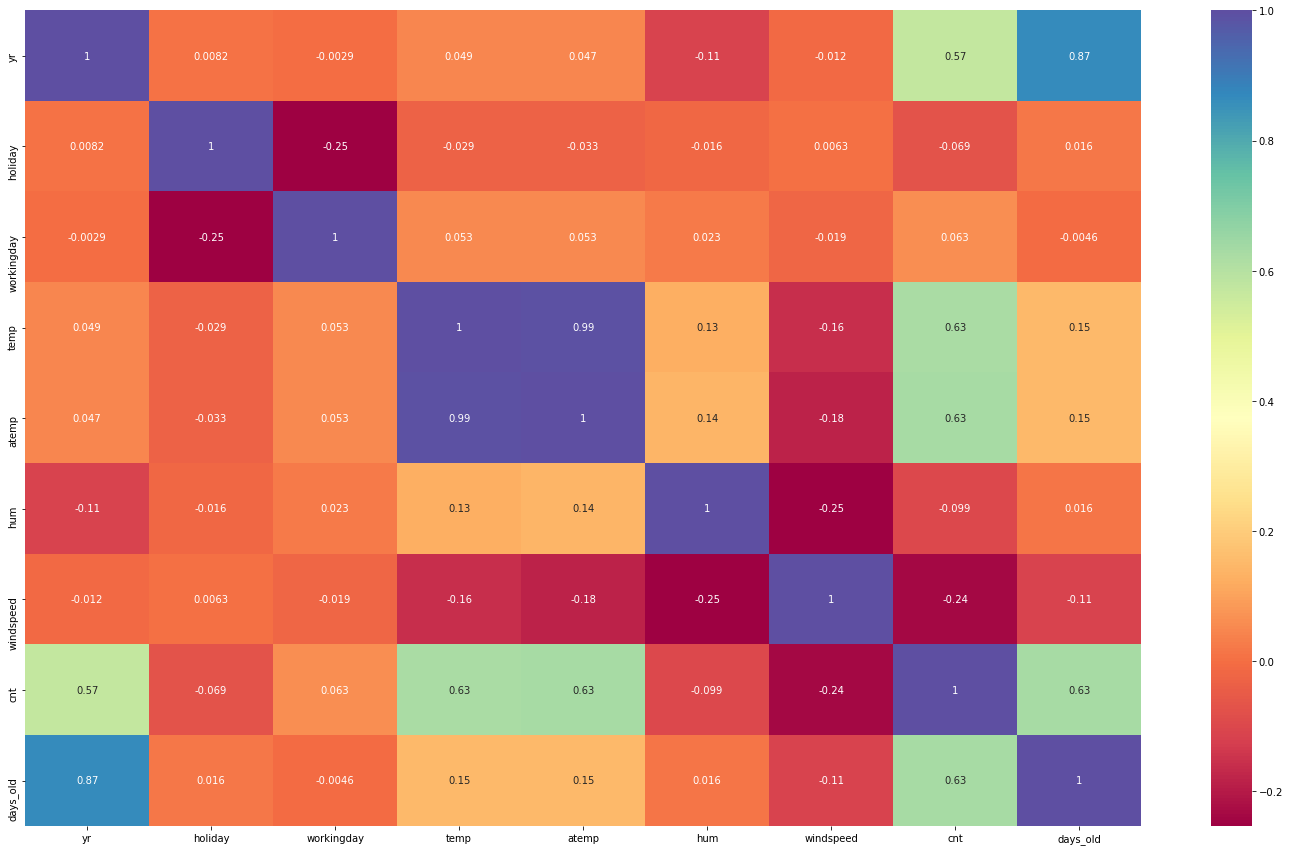

In [31]:
#Correlations for numeric variables
cor=bikeSharingDataFrame.corr()
plt.figure(figsize=(25,15))
sns.heatmap(cor, cmap="Spectral", annot = True)
plt.show()

##### From the correlation map, temp, atemp and days_old seems to be highly correlated and only should variable can be considered for the model. However let us elminate it based on the Variance Inflation Factor later during the model building.
##### We also see Target variable has a linear relationship with some of the  indeptendent variables. Good sign for building a linear regression Model.

In [32]:
bikeSharingDataFrame.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849,364.500000
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647,210.877136
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,182.250000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,364.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,546.750000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,729.000000


#### 4.5 Analysing Categorical Variabels with target variables 

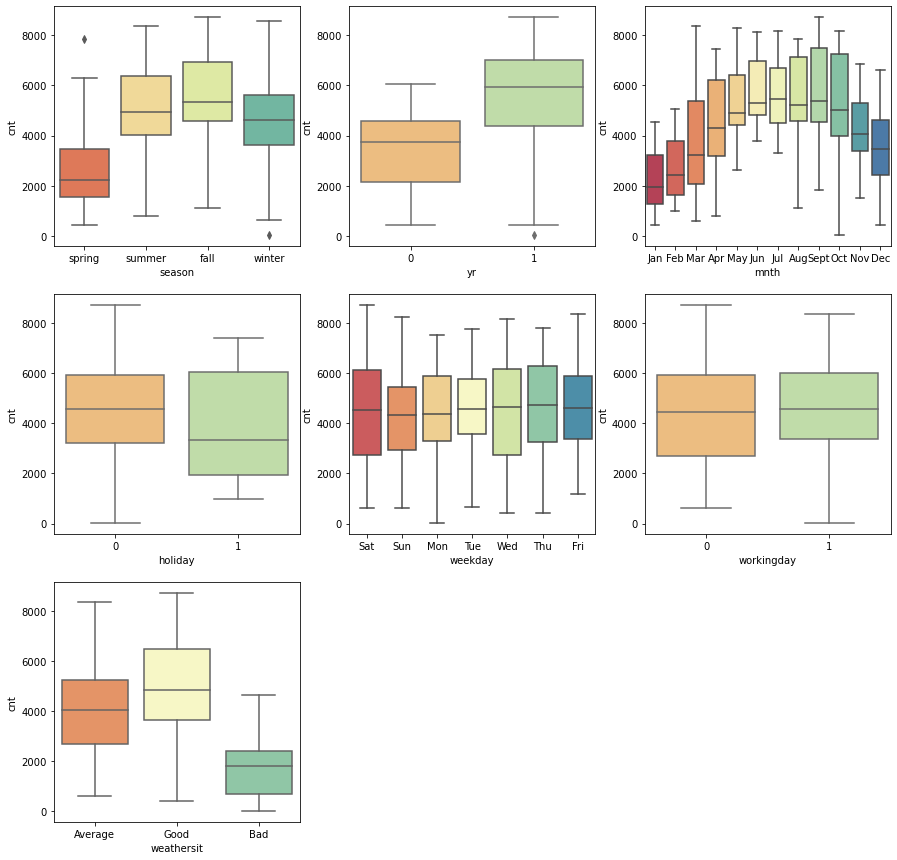

In [33]:
# Boxplot for categorical variables to see demands
vars_cat = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bikeSharingDataFrame, x=i[1], y='cnt', palette='Spectral')
plt.show()

#### _`Inference`_:
    Here many insights can be drawn from the plots

    1. Season: 3:fall has highest demand for rental bikes
    2. I see that demand for next year has grown
    3. Demand is continuously growing each month till June. September month has highest demand. After September, demand is decreasing
    4. When there is a holiday, demand has decreased.
    5. Weekday is not giving clear picture abount demand.
    6. The clear weathershit has highest demand
    7. During September, bike sharing is more. During the year end and beginning, it is less, could be due to extereme weather conditions.

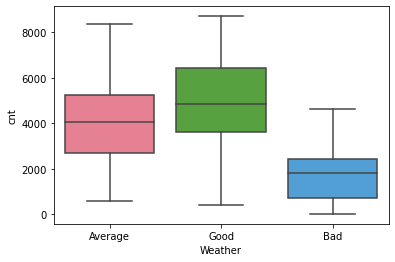

In [34]:
# Boxplot for weather against count of rental bikes
sns.boxplot(x='weathersit', y='cnt', data=bikeSharingDataFrame, palette='husl')
plt.xlabel('Weather')
plt.show()

#### _`Inference`_:
    Count picks up on good weather days

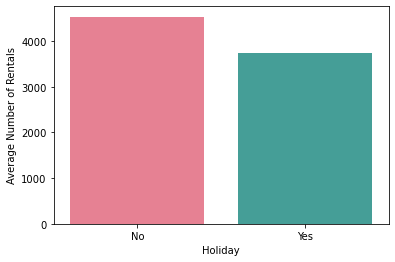

In [35]:
# Checking business on Holidays
holiday_df = bikeSharingDataFrame.groupby(['holiday'])['cnt'].mean().reset_index()
sns.barplot(x='holiday', y='cnt', data=holiday_df, palette='husl')
plt.xticks(np.arange(2),('No','Yes'))
plt.xlabel('Holiday')
plt.ylabel('Average Number of Rentals')
plt.show()

#### _`Inference`_:
    Non Holidays have slight higher average rentals

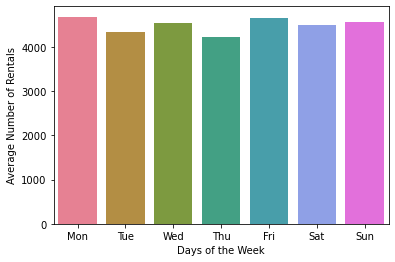

In [36]:
# Total rentals on different days of the week.
weekday_df = bikeSharingDataFrame.groupby(['weekday'])['cnt'].mean().reset_index()
sns.barplot(x='weekday', y='cnt', data=weekday_df, palette='husl')
plt.xticks(np.arange(7),('Mon','Tue','Wed','Thu', 'Fri', 'Sat', 'Sun'))
plt.xlabel('Days of the Week')
plt.ylabel('Average Number of Rentals')
plt.show()

#### _`Inference`_:
    Rentals are uniform throuout the week but there is a small uptrend as weekend appraches.

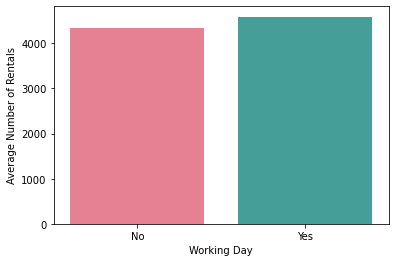

In [37]:
# Checking business on Workingdays
workingday_df = bikeSharingDataFrame.groupby(['workingday'])['cnt'].mean().reset_index()
sns.barplot(x='workingday', y='cnt', data=workingday_df, palette='husl')
plt.xticks(np.arange(2),('No','Yes'))
plt.xlabel('Working Day')
plt.ylabel('Average Number of Rentals')
plt.show()

#### _`Inference`_:
    Retntals are merginally more on working days.

# 5. Data Preparation for Linear Regression

#### 5.1 Create dummy variables for all categorical variables
    - season
    - mnth
    - weekday
    - weathersit

In [38]:
bikeSharingDataFrame = pd.get_dummies(data=bikeSharingDataFrame,columns=["season","mnth","weekday"],drop_first=True)
bikeSharingDataFrame = pd.get_dummies(data=bikeSharingDataFrame,columns=["weathersit"])

- Dropping the first columns as (p-1) dummies can explain p categories.
- In weathersit first column was not dropped so as to not lose the info about severe weather situation.

In [39]:
#Print columns after creating dummies
bikeSharingDataFrame.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'days_old', 'season_spring', 'season_summer', 'season_winter',
       'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sept',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed', 'weathersit_Average', 'weathersit_Bad',
       'weathersit_Good'],
      dtype='object')

In [40]:
#Print few rows to inspect
bikeSharingDataFrame.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old,season_spring,...,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Average,weathersit_Bad,weathersit_Good
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,0,1,0,0,0,0,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,1,...,0,0,0,1,0,0,0,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,2,1,...,0,1,0,0,0,0,0,0,0,1
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,3,1,...,0,0,0,0,0,1,0,0,0,1
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,4,1,...,0,0,0,0,0,0,1,0,0,1


## 6. Model Building

### 6.1 Split Data into training and test

In [42]:
# Checking shape before splitting
bikeSharingDataFrame.shape

(730, 32)

In [43]:
# Moving the cnt to the end for easier identification
first_col = bikeSharingDataFrame.pop('cnt')
bikeSharingDataFrame['cnt'] = first_col
bikeSharingDataFrame.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Average,weathersit_Bad,weathersit_Good,cnt
0,0,0,0,14.110847,18.18125,80.5833,10.749882,0,1,0,...,0,1,0,0,0,0,1,0,0,985
1,0,0,0,14.902598,17.68695,69.6087,16.652113,1,1,0,...,0,0,1,0,0,0,1,0,0,801
2,0,0,1,8.050924,9.47025,43.7273,16.636703,2,1,0,...,1,0,0,0,0,0,0,0,1,1349
3,0,0,1,8.200000,10.60610,59.0435,10.739832,3,1,0,...,0,0,0,0,1,0,0,0,1,1562
4,0,0,1,9.305237,11.46350,43.6957,12.522300,4,1,0,...,0,0,0,0,0,1,0,0,1,1600


In [74]:
bikeSharingDataFrame_train, bikeSharingDataFrame_test = train_test_split(bikeSharingDataFrame, train_size=0.7, random_state=100)

In [75]:
#Inspect train and test
print('Shape of the Train data is:' , bikeSharingDataFrame_train.shape)
print('Shape of the Test data is:' , bikeSharingDataFrame_test.shape)

Shape of the Train data is: (510, 32)
Shape of the Test data is: (220, 32)


In [76]:
# Checking the Train Data
pd.set_option('display.max_columns', None)
bikeSharingDataFrame_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Average,weathersit_Bad,weathersit_Good,cnt
576,1,0,1,29.246653,33.1448,70.4167,11.083475,576,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,7216
426,1,0,0,16.980847,20.6746,62.1250,10.792293,426,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,4066
728,1,0,0,10.489153,11.5850,48.3333,23.500518,728,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1796
482,1,0,0,15.443347,18.8752,48.9583,8.708325,482,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,4220
111,0,0,1,13.803347,16.0977,72.9583,14.707907,111,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1683


#### 6.2 Feature Scaling continuous variables

To make all features in same scale to interpret easily

Following columns are continous to be scaled
temp,hum,windspeed

In [77]:
# We do a MinMax scaling
scaler = MinMaxScaler()    #Instantiating the object
cols = bikeSharingDataFrame_train.columns
bikeSharingDataFrame_train[cols] = scaler.fit_transform(bikeSharingDataFrame_train[cols])

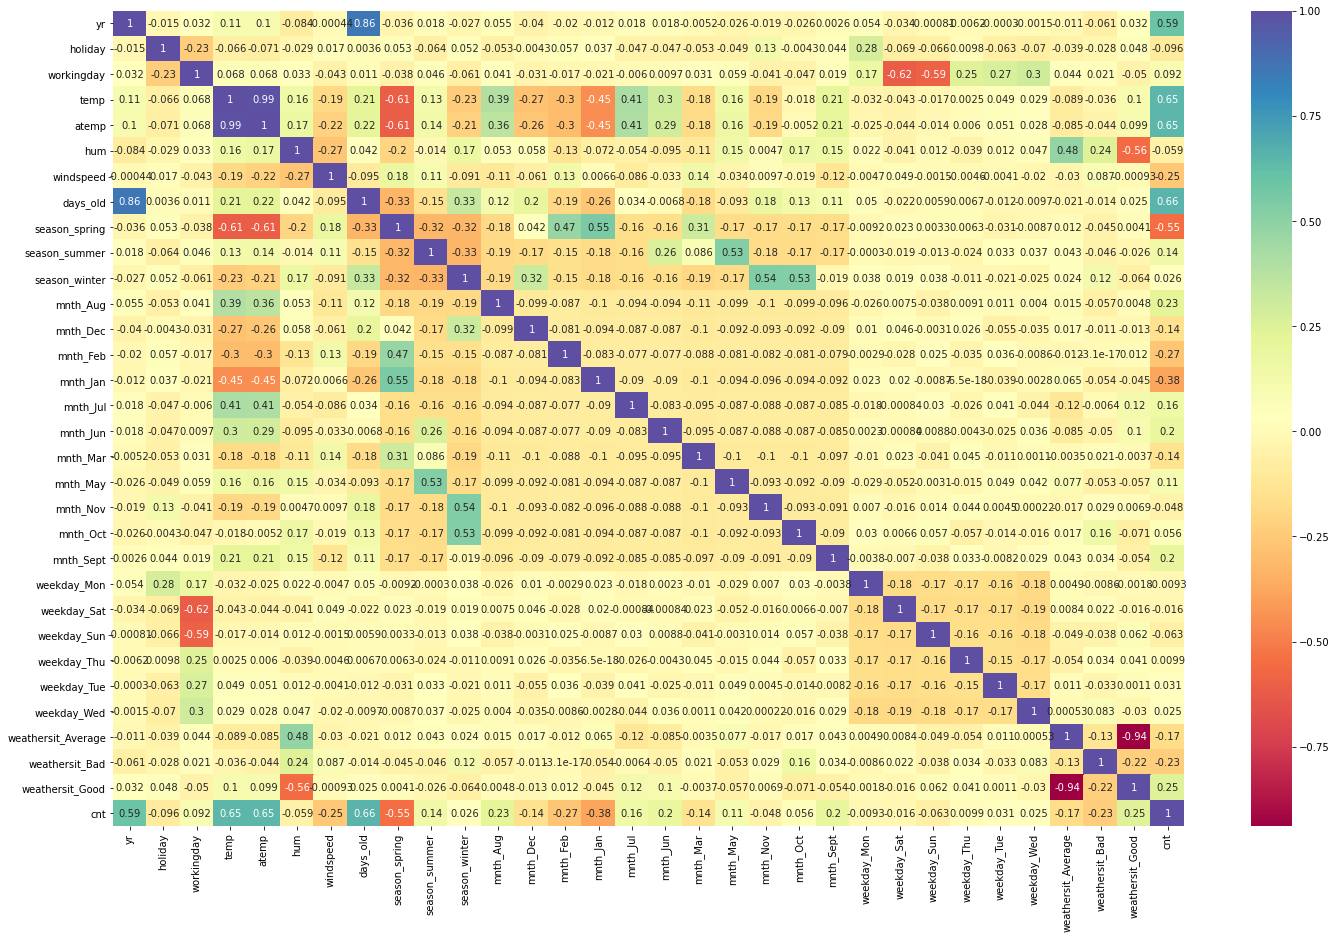

In [78]:
# Checking the Heatmap
plt.figure(figsize=(24,15))
sns.heatmap(bikeSharingDataFrame_train.corr(),annot=True, cmap='Spectral')
plt.show()

In [79]:
bikeSharingDataFrame_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Average,weathersit_Bad,weathersit_Good,cnt
576,1.0,0.0,1.0,0.815169,0.766351,0.725633,0.264686,0.791209,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.827658
426,1.0,0.0,0.0,0.442393,0.438975,0.640189,0.255342,0.585165,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.465255
728,1.0,0.0,0.0,0.245101,0.200348,0.498067,0.663106,1.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.204096
482,1.0,0.0,0.0,0.395666,0.391735,0.504508,0.188475,0.662088,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.482973
111,0.0,0.0,1.0,0.345824,0.318819,0.751824,0.380981,0.152473,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.191095


#### _`Inference`_:
    - cnt has strong colinearity with yr, temp, atemp.
    - But, temp and atemp have almost a perfect colinearity, so both cannot be part of the model. We keep this in mind while building the model in the following cells.

### 6.3 Build a Model

Since the number of columns is 32, which is manageable, we first build a model with all the columns, and then keep removing the columns based upon Statistical Significance and Co-Linearity.
We will stop when we notice that there is no further improvement in the R2 value or all variables are statistically significant with low VIF.

#### 6.3.1 Model 1 - There wil be several iterations before getting the perfect model, so lets start!

In [80]:
y_train = bikeSharingDataFrame_train.pop('cnt')
X_train = bikeSharingDataFrame_train
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm)
lr_model1 = lr.fit()
lr_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     95.78
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          2.62e-179
Time:                        15:29:11   Log-Likelihood:                 527.21
No. Observations:                 510   AIC:                            -994.4
Df Residuals:                     480   BIC:                            -867.4
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1370      0.041      3.343      0.001       0.056       0.217
yr                     0.2968      0.164      1.806      0.071      -0.026       0.620
holiday               -0.0157      0.024     -0.643      0.520      -0.064       0.032
workingday             0.0698      0.014      5.134      0.000       0.043       0.097
temp                   0.3903      0.143      2.739      0.006       0.110       0.670
atemp                  0.0562      0.139      0.405      0.685      -0.216       0.329
hum                   -0.1510      0.039     -3.898      0.000      -0.227      -0.075
windspeed             -0.1834      0.026     -6.945      0.000      -0.235      -0.131
days_old              -0.1282      0.327     -0.392      0.695      -0.771       0.515
season_spring         -0.0460      0.030     -1.530      0.127      -0.105       0.013
season_summer          0.0425      0.026      1.619      0.106      -0.009       0.094
season_winter          0.1063      0.028      3.786      0.000       0.051       0.161
mnth_Aug               0.0440      0.065      0.677      0.499      -0.084       0.172
mnth_Dec              -0.0007      0.116     -0.006      0.995      -0.229       0.228
mnth_Feb              -0.0422      0.042     -1.016      0.310      -0.124       0.039
mnth_Jan              -0.0782      0.051     -1.528      0.127      -0.179       0.022
mnth_Jul              -0.0164      0.054     -0.303      0.762      -0.123       0.090
mnth_Jun               0.0169      0.037      0.452      0.651      -0.057       0.091
mnth_Mar              -0.0034      0.028     -0.124      0.901      -0.058       0.051
mnth_May               0.0307      0.025      1.232      0.219      -0.018       0.080
mnth_Nov              -0.0012      0.105     -0.012      0.991      -0.208       0.205
mnth_Oct               0.0412      0.093      0.444      0.657      -0.141       0.223
mnth_Sept              0.1138      0.076      1.497      0.135      -0.036       0.263
weekday_Mon           -0.0216      0.015     -1.398      0.163      -0.052       0.009
weekday_Sat            0.0686      0.015      4.623      0.000       0.039       0.098
weekday_Sun            0.0143      0.015      0.950      0.343      -0.015       0.044
weekday_Thu           -0.0098      0.016     -0.626      0.532      -0.040       0.021
weekday_Tue           -0.0185      0.016     -1.187      0.236      -0.049       0.012
weekday_Wed           -0.0060      0.015     -0.398      0.691      -0.035       0.023
weathersit_Average     0.0908      0.016      5.779      0.000       0.060       0.122
weathersit_Bad        -0.1046      0.024     -4.430      0.000      -0.151      -0.058
weathersit_Good        0.1508      0.015      9.814      0.000       0.121       0.181
======================================

##### Checking VIF (Variance Inflation Factor - MultiColinearity)

In [68]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
30,weathersit_Good,inf
1,holiday,inf
2,workingday,inf
29,weathersit_Bad,inf
28,weathersit_Average,inf
24,weekday_Sun,inf
23,weekday_Sat,inf
7,days_old,573.81
0,yr,437.39
12,mnth_Dec,67.60


The R-squared is a significant 85%, but there are insignificant variables and variables with strong multicollinearity. We need to get rid of them, in the following cells, we will follow the same process in an itrative manner till we build a robust model. First we will remove all columns with High P Values and then when the P Values are acceptable for all the columns, we will check their VIF and remove them.

#### 6.3.3 Model 2 - Removing 'mnth_Dec' due to high P-Value

In [81]:
X = X_train.drop('mnth_Dec',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model2 = lr.fit()
lr_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.40
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          2.61e-180
Time:                        15:29:16   Log-Likelihood:                 527.21
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     481   BIC:                            -873.6
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1371      0.034      4.090      0.000       0.071       0.203
yr                     0.2978      0.048      6.183      0.000       0.203       0.392
holiday               -0.0157      0.024     -0.659      0.510      -0.062       0.031
workingday             0.0698      0.012      5.794      0.000       0.046       0.094
temp                   0.3904      0.142      2.748      0.006       0.111       0.669
atemp                  0.0562      0.138      0.406      0.685      -0.216       0.328
hum                   -0.1510      0.039     -3.903      0.000      -0.227      -0.075
windspeed             -0.1834      0.026     -6.955      0.000      -0.235      -0.132
days_old              -0.1300      0.095     -1.373      0.170      -0.316       0.056
season_spring         -0.0461      0.030     -1.537      0.125      -0.105       0.013
season_summer          0.0425      0.026      1.635      0.103      -0.009       0.094
season_winter          0.1063      0.028      3.855      0.000       0.052       0.160
mnth_Aug               0.0443      0.031      1.416      0.157      -0.017       0.106
mnth_Feb              -0.0423      0.037     -1.128      0.260      -0.116       0.031
mnth_Jan              -0.0783      0.041     -1.898      0.058      -0.159       0.003
mnth_Jul              -0.0162      0.033     -0.493      0.623      -0.081       0.048
mnth_Jun               0.0171      0.024      0.707      0.480      -0.030       0.065
mnth_Mar              -0.0035      0.027     -0.131      0.896      -0.056       0.049
mnth_May               0.0308      0.021      1.492      0.136      -0.010       0.071
mnth_Nov              -0.0006      0.021     -0.029      0.977      -0.041       0.040
mnth_Oct               0.0417      0.022      1.901      0.058      -0.001       0.085
mnth_Sept              0.1142      0.027      4.242      0.000       0.061       0.167
weekday_Mon           -0.0216      0.015     -1.399      0.162      -0.052       0.009
weekday_Sat            0.0686      0.014      5.056      0.000       0.042       0.095
weekday_Sun            0.0143      0.014      1.034      0.302      -0.013       0.041
weekday_Thu           -0.0098      0.016     -0.626      0.531      -0.040       0.021
weekday_Tue           -0.0185      0.016     -1.188      0.235      -0.049       0.012
weekday_Wed           -0.0060      0.015     -0.398      0.691      -0.035       0.023
weathersit_Average     0.0909      0.014      6.584      0.000       0.064       0.118
weathersit_Bad        -0.1046      0.022     -4.687      0.000      -0.148      -0.061
weathersit_Good        0.1508      0.013     11.697      0.000       0.125       0.176
==============================================================================
Omnibus:                       83.000   Durbin

#### 6.3.4 Model 3 - Removing 'mnth_Nov' due to high P-Value

In [82]:
X = X.drop('mnth_Nov',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model3 = lr.fit()
lr_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.3
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          2.54e-181
Time:                        15:29:20   Log-Likelihood:                 527.20
No. Observations:                 510   AIC:                            -998.4
Df Residuals:                     482   BIC:                            -879.8
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1370      0.033      4.112      0.000       0.072       0.202
yr                     0.2978      0.048      6.190      0.000       0.203       0.392
holiday               -0.0158      0.024     -0.669      0.504      -0.062       0.031
workingday             0.0698      0.012      5.801      0.000       0.046       0.094
temp                   0.3902      0.142      2.751      0.006       0.112       0.669
atemp                  0.0562      0.138      0.407      0.684      -0.215       0.328
hum                   -0.1509      0.039     -3.908      0.000      -0.227      -0.075
windspeed             -0.1834      0.026     -6.981      0.000      -0.235      -0.132
days_old              -0.1300      0.095     -1.374      0.170      -0.316       0.056
season_spring         -0.0459      0.030     -1.555      0.121      -0.104       0.012
season_summer          0.0426      0.026      1.669      0.096      -0.008       0.093
season_winter          0.1061      0.027      3.974      0.000       0.054       0.159
mnth_Aug               0.0445      0.031      1.450      0.148      -0.016       0.105
mnth_Feb              -0.0423      0.037     -1.129      0.259      -0.116       0.031
mnth_Jan              -0.0783      0.041     -1.900      0.058      -0.159       0.003
mnth_Jul              -0.0160      0.032     -0.497      0.620      -0.079       0.047
mnth_Jun               0.0172      0.024      0.717      0.473      -0.030       0.064
mnth_Mar              -0.0035      0.027     -0.130      0.896      -0.056       0.049
mnth_May               0.0308      0.021      1.497      0.135      -0.010       0.071
mnth_Oct               0.0421      0.018      2.296      0.022       0.006       0.078
mnth_Sept              0.1144      0.026      4.419      0.000       0.064       0.165
weekday_Mon           -0.0216      0.015     -1.400      0.162      -0.052       0.009
weekday_Sat            0.0686      0.014      5.061      0.000       0.042       0.095
weekday_Sun            0.0143      0.014      1.035      0.301      -0.013       0.041
weekday_Thu           -0.0098      0.016     -0.629      0.530      -0.040       0.021
weekday_Tue           -0.0185      0.016     -1.192      0.234      -0.049       0.012
weekday_Wed           -0.0060      0.015     -0.401      0.689      -0.035       0.023
weathersit_Average     0.0908      0.014      6.605      0.000       0.064       0.118
weathersit_Bad        -0.1046      0.022     -4.705      0.000      -0.148      -0.061
weathersit_Good        0.1508      0.013     11.730      0.000       0.126       0.176
==============================================================================
Omnibus:                       83.064   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (J

#### 6.3.5 Model 4 Removing 'mnth_Mar' due to high P-Value

In [83]:
X = X.drop('mnth_Mar',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model4 = lr.fit()
lr_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     107.5
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          2.45e-182
Time:                        15:29:26   Log-Likelihood:                 527.20
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     483   BIC:                            -886.1
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1350      0.029      4.593      0.000       0.077       0.193
yr                     0.2934      0.035      8.428      0.000       0.225       0.362
holiday               -0.0163      0.023     -0.698      0.485      -0.062       0.029
workingday             0.0693      0.011      6.134      0.000       0.047       0.092
temp                   0.3907      0.142      2.758      0.006       0.112       0.669
atemp                  0.0569      0.138      0.412      0.681      -0.214       0.328
hum                   -0.1515      0.038     -3.947      0.000      -0.227      -0.076
windspeed             -0.1832      0.026     -6.990      0.000      -0.235      -0.132
days_old              -0.1214      0.068     -1.797      0.073      -0.254       0.011
season_spring         -0.0471      0.028     -1.672      0.095      -0.102       0.008
season_summer          0.0433      0.025      1.737      0.083      -0.006       0.092
season_winter          0.1054      0.026      4.030      0.000       0.054       0.157
mnth_Aug               0.0445      0.031      1.453      0.147      -0.016       0.105
mnth_Feb              -0.0385      0.023     -1.651      0.099      -0.084       0.007
mnth_Jan              -0.0740      0.025     -2.981      0.003      -0.123      -0.025
mnth_Jul              -0.0157      0.032     -0.489      0.625      -0.079       0.047
mnth_Jun               0.0175      0.024      0.734      0.463      -0.029       0.064
mnth_May               0.0314      0.020      1.567      0.118      -0.008       0.071
mnth_Oct               0.0423      0.018      2.326      0.020       0.007       0.078
mnth_Sept              0.1144      0.026      4.423      0.000       0.064       0.165
weekday_Mon           -0.0216      0.015     -1.403      0.161      -0.052       0.009
weekday_Sat            0.0681      0.013      5.292      0.000       0.043       0.093
weekday_Sun            0.0138      0.013      1.038      0.300      -0.012       0.040
weekday_Thu           -0.0099      0.016     -0.635      0.526      -0.040       0.021
weekday_Tue           -0.0185      0.016     -1.193      0.234      -0.049       0.012
weekday_Wed           -0.0060      0.015     -0.401      0.688      -0.035       0.023
weathersit_Average     0.0902      0.013      7.058      0.000       0.065       0.115
weathersit_Bad        -0.1053      0.022     -4.872      0.000      -0.148      -0.063
weathersit_Good        0.1501      0.012     12.907      0.000       0.127       0.173
==============================================================================
Omnibus:                       83.231   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              229.366
Skew:                          -0.796   Prob(JB):             

#### 6.3.6 Model 5 Removing 'weekday_Wed' due to high P-Value

In [84]:
X = X.drop('weekday_Wed',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model5 = lr.fit()
lr_model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     112.0
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          2.48e-183
Time:                        15:29:33   Log-Likelihood:                 527.11
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     484   BIC:                            -892.1
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1342      0.029      4.580      0.000       0.077       0.192
yr                     0.2932      0.035      8.430      0.000       0.225       0.362
holiday               -0.0179      0.023     -0.784      0.433      -0.063       0.027
workingday             0.0674      0.010      6.587      0.000       0.047       0.087
temp                   0.3939      0.141      2.787      0.006       0.116       0.672
atemp                  0.0534      0.138      0.388      0.698      -0.217       0.324
hum                   -0.1521      0.038     -3.970      0.000      -0.227      -0.077
windspeed             -0.1834      0.026     -7.004      0.000      -0.235      -0.132
days_old              -0.1210      0.067     -1.794      0.073      -0.254       0.012
season_spring         -0.0472      0.028     -1.678      0.094      -0.102       0.008
season_summer          0.0432      0.025      1.734      0.084      -0.006       0.092
season_winter          0.1052      0.026      4.026      0.000       0.054       0.157
mnth_Aug               0.0444      0.031      1.451      0.147      -0.016       0.105
mnth_Feb              -0.0384      0.023     -1.649      0.100      -0.084       0.007
mnth_Jan              -0.0741      0.025     -2.984      0.003      -0.123      -0.025
mnth_Jul              -0.0155      0.032     -0.485      0.628      -0.078       0.047
mnth_Jun               0.0172      0.024      0.724      0.470      -0.030       0.064
mnth_May               0.0313      0.020      1.565      0.118      -0.008       0.071
mnth_Oct               0.0425      0.018      2.340      0.020       0.007       0.078
mnth_Sept              0.1142      0.026      4.420      0.000       0.063       0.165
weekday_Mon           -0.0183      0.013     -1.410      0.159      -0.044       0.007
weekday_Sat            0.0695      0.012      5.620      0.000       0.045       0.094
weekday_Sun            0.0152      0.013      1.188      0.235      -0.010       0.040
weekday_Thu           -0.0065      0.013     -0.498      0.619      -0.032       0.019
weekday_Tue           -0.0152      0.013     -1.158      0.247      -0.041       0.011
weathersit_Average     0.0904      0.013      7.083      0.000       0.065       0.115
weathersit_Bad        -0.1062      0.021     -4.941      0.000      -0.148      -0.064
weathersit_Good        0.1500      0.012     12.912      0.000       0.127       0.173
==============================================================================
Omnibus:                       82.699   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.826
Skew:                          -0.791   Prob(JB):                     3.37e-50
Kurtosis:                       5.867   Cond. No.                     

#### 6.3.7 Model 6 Removing 'atemp' due to high P-Value

In [85]:
X = X.drop('atemp',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model6 = lr.fit()
lr_model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     116.8
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          2.44e-184
Time:                        15:31:27   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     485   BIC:                            -898.2
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1338      0.029      4.574      0.000       0.076       0.191
yr                     0.2930      0.035      8.432      0.000       0.225       0.361
holiday               -0.0187      0.023     -0.819      0.413      -0.063       0.026
workingday             0.0674      0.010      6.590      0.000       0.047       0.087
temp                   0.4458      0.045      9.868      0.000       0.357       0.535
hum                   -0.1516      0.038     -3.962      0.000      -0.227      -0.076
windspeed             -0.1856      0.026     -7.260      0.000      -0.236      -0.135
days_old              -0.1207      0.067     -1.791      0.074      -0.253       0.012
season_spring         -0.0468      0.028     -1.667      0.096      -0.102       0.008
season_summer          0.0438      0.025      1.764      0.078      -0.005       0.093
season_winter          0.1057      0.026      4.053      0.000       0.054       0.157
mnth_Aug               0.0428      0.030      1.412      0.159      -0.017       0.102
mnth_Feb              -0.0383      0.023     -1.646      0.100      -0.084       0.007
mnth_Jan              -0.0740      0.025     -2.986      0.003      -0.123      -0.025
mnth_Jul              -0.0166      0.032     -0.519      0.604      -0.079       0.046
mnth_Jun               0.0160      0.024      0.679      0.497      -0.030       0.062
mnth_May               0.0306      0.020      1.537      0.125      -0.009       0.070
mnth_Oct               0.0424      0.018      2.336      0.020       0.007       0.078
mnth_Sept              0.1135      0.026      4.408      0.000       0.063       0.164
weekday_Mon           -0.0179      0.013     -1.383      0.167      -0.043       0.008
weekday_Sat            0.0697      0.012      5.645      0.000       0.045       0.094
weekday_Sun            0.0154      0.013      1.205      0.229      -0.010       0.041
weekday_Thu           -0.0062      0.013     -0.474      0.636      -0.032       0.019
weekday_Tue           -0.0149      0.013     -1.141      0.254      -0.041       0.011
weathersit_Average     0.0905      0.013      7.098      0.000       0.065       0.115
weathersit_Bad        -0.1068      0.021     -4.986      0.000      -0.149      -0.065
weathersit_Good        0.1501      0.012     12.942      0.000       0.127       0.173
==============================================================================
Omnibus:                       82.065   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              225.456
Skew:                          -0.786   Prob(JB):                     1.10e-49
Kurtosis:                       5.853   Cond. No.                     1.19e+16
==============================================================================

#### 6.3.8 Model 7- Removing 'weekday_Thu' due to high P-Value

In [87]:
X = X.drop('weekday_Thu',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model7 = lr.fit()
lr_model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     122.1
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          2.44e-185
Time:                        15:34:13   Log-Likelihood:                 526.91
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     486   BIC:                            -904.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1329      0.029      4.556      0.000       0.076       0.190
yr                     0.2932      0.035      8.445      0.000       0.225       0.361
holiday               -0.0202      0.023     -0.897      0.370      -0.064       0.024
workingday             0.0663      0.010      6.663      0.000       0.047       0.086
temp                   0.4456      0.045      9.872      0.000       0.357       0.534
hum                   -0.1514      0.038     -3.960      0.000      -0.226      -0.076
windspeed             -0.1856      0.026     -7.268      0.000      -0.236      -0.135
days_old              -0.1211      0.067     -1.798      0.073      -0.253       0.011
season_spring         -0.0466      0.028     -1.660      0.098      -0.102       0.009
season_summer          0.0442      0.025      1.780      0.076      -0.005       0.093
season_winter          0.1060      0.026      4.068      0.000       0.055       0.157
mnth_Aug               0.0433      0.030      1.432      0.153      -0.016       0.103
mnth_Feb              -0.0379      0.023     -1.634      0.103      -0.084       0.008
mnth_Jan              -0.0740      0.025     -2.987      0.003      -0.123      -0.025
mnth_Jul              -0.0159      0.032     -0.500      0.617      -0.078       0.047
mnth_Jun               0.0164      0.024      0.695      0.488      -0.030       0.063
mnth_May               0.0308      0.020      1.550      0.122      -0.008       0.070
mnth_Oct               0.0429      0.018      2.364      0.018       0.007       0.078
mnth_Sept              0.1138      0.026      4.426      0.000       0.063       0.164
weekday_Mon           -0.0159      0.012     -1.301      0.194      -0.040       0.008
weekday_Sat            0.0705      0.012      5.780      0.000       0.047       0.095
weekday_Sun            0.0163      0.013      1.284      0.200      -0.009       0.041
weekday_Tue           -0.0130      0.012     -1.047      0.296      -0.037       0.011
weathersit_Average     0.0903      0.013      7.096      0.000       0.065       0.115
weathersit_Bad        -0.1073      0.021     -5.021      0.000      -0.149      -0.065
weathersit_Good        0.1498      0.012     12.948      0.000       0.127       0.173
==============================================================================
Omnibus:                       82.584   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.777
Skew:                          -0.789   Prob(JB):                     3.46e-50
Kurtosis:                       5.868   Cond. No.                     1.19e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correct

#### 6.3.9 Model 8- Removing 'mnth_Jul' due to high P-Value

In [88]:
X = X.drop('mnth_Jul',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model8 = lr.fit()
lr_model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     127.8
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          2.41e-186
Time:                        15:36:03   Log-Likelihood:                 526.78
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     487   BIC:                            -910.2
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1305      0.029      4.539      0.000       0.074       0.187
yr                     0.2949      0.035      8.540      0.000       0.227       0.363
holiday               -0.0198      0.022     -0.881      0.379      -0.064       0.024
workingday             0.0656      0.010      6.662      0.000       0.046       0.085
temp                   0.4343      0.039     11.113      0.000       0.358       0.511
hum                   -0.1495      0.038     -3.933      0.000      -0.224      -0.075
windspeed             -0.1847      0.025     -7.256      0.000      -0.235      -0.135
days_old              -0.1239      0.067     -1.847      0.065      -0.256       0.008
season_spring         -0.0394      0.024     -1.636      0.103      -0.087       0.008
season_summer          0.0509      0.021      2.446      0.015       0.010       0.092
season_winter          0.1130      0.022      5.147      0.000       0.070       0.156
mnth_Aug               0.0555      0.018      3.102      0.002       0.020       0.091
mnth_Feb              -0.0394      0.023     -1.715      0.087      -0.085       0.006
mnth_Jan              -0.0764      0.024     -3.147      0.002      -0.124      -0.029
mnth_Jun               0.0237      0.018      1.290      0.198      -0.012       0.060
mnth_May               0.0341      0.019      1.821      0.069      -0.003       0.071
mnth_Oct               0.0451      0.018      2.566      0.011       0.011       0.080
mnth_Sept              0.1233      0.017      7.069      0.000       0.089       0.158
weekday_Mon           -0.0161      0.012     -1.322      0.187      -0.040       0.008
weekday_Sat            0.0694      0.012      5.790      0.000       0.046       0.093
weekday_Sun            0.0153      0.012      1.221      0.223      -0.009       0.040
weekday_Tue           -0.0132      0.012     -1.064      0.288      -0.038       0.011
weathersit_Average     0.0895      0.013      7.100      0.000       0.065       0.114
weathersit_Bad        -0.1083      0.021     -5.092      0.000      -0.150      -0.066
weathersit_Good        0.1492      0.012     12.969      0.000       0.127       0.172
==============================================================================
Omnibus:                       83.900   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.659
Skew:                          -0.797   Prob(JB):                     1.11e-51
Kurtosis:                       5.916   Cond. No.                     2.69e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.61e-30. This might indicate that there a

#### 6.3.10 Model 9- Removing 'weekday_Tue' due to high P-Value

In [89]:
X = X.drop('weekday_Tue',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model9 = lr.fit()
lr_model9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     133.8
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          3.61e-187
Time:                        15:45:10   Log-Likelihood:                 526.19
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     488   BIC:                            -915.2
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1303      0.029      4.532      0.000       0.074       0.187
yr                     0.2938      0.035      8.511      0.000       0.226       0.362
holiday               -0.0208      0.022     -0.927      0.354      -0.065       0.023
workingday             0.0638      0.010      6.576      0.000       0.045       0.083
temp                   0.4334      0.039     11.090      0.000       0.357       0.510
hum                   -0.1506      0.038     -3.963      0.000      -0.225      -0.076
windspeed             -0.1851      0.025     -7.275      0.000      -0.235      -0.135
days_old              -0.1217      0.067     -1.816      0.070      -0.253       0.010
season_spring         -0.0386      0.024     -1.606      0.109      -0.086       0.009
season_summer          0.0510      0.021      2.450      0.015       0.010       0.092
season_winter          0.1126      0.022      5.130      0.000       0.069       0.156
mnth_Aug               0.0559      0.018      3.125      0.002       0.021       0.091
mnth_Feb              -0.0404      0.023     -1.759      0.079      -0.086       0.005
mnth_Jan              -0.0763      0.024     -3.144      0.002      -0.124      -0.029
mnth_Jun               0.0245      0.018      1.333      0.183      -0.012       0.061
mnth_May               0.0342      0.019      1.824      0.069      -0.003       0.071
mnth_Oct               0.0451      0.018      2.568      0.011       0.011       0.080
mnth_Sept              0.1238      0.017      7.099      0.000       0.090       0.158
weekday_Mon           -0.0130      0.012     -1.101      0.272      -0.036       0.010
weekday_Sat            0.0707      0.012      5.924      0.000       0.047       0.094
weekday_Sun            0.0167      0.012      1.340      0.181      -0.008       0.041
weathersit_Average     0.0890      0.013      7.069      0.000       0.064       0.114
weathersit_Bad        -0.1074      0.021     -5.054      0.000      -0.149      -0.066
weathersit_Good        0.1486      0.011     12.930      0.000       0.126       0.171
==============================================================================
Omnibus:                       84.382   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              242.030
Skew:                          -0.793   Prob(JB):                     2.78e-53
Kurtosis:                       5.979   Cond. No.                     2.84e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.33e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### 6.3.11 Model 10- Removing 'holiday' due to high P-Value

In [90]:
X = X.drop('holiday',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model9 = lr.fit()
lr_model9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     133.8
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          3.61e-187
Time:                        15:46:45   Log-Likelihood:                 526.19
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     488   BIC:                            -915.2
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1147      0.040      2.881      0.004       0.036       0.193
yr                     0.2938      0.035      8.511      0.000       0.226       0.362
workingday             0.0846      0.026      3.231      0.001       0.033       0.136
temp                   0.4334      0.039     11.090      0.000       0.357       0.510
hum                   -0.1506      0.038     -3.963      0.000      -0.225      -0.076
windspeed             -0.1851      0.025     -7.275      0.000      -0.235      -0.135
days_old              -0.1217      0.067     -1.816      0.070      -0.253       0.010
season_spring         -0.0386      0.024     -1.606      0.109      -0.086       0.009
season_summer          0.0510      0.021      2.450      0.015       0.010       0.092
season_winter          0.1126      0.022      5.130      0.000       0.069       0.156
mnth_Aug               0.0559      0.018      3.125      0.002       0.021       0.091
mnth_Feb              -0.0404      0.023     -1.759      0.079      -0.086       0.005
mnth_Jan              -0.0763      0.024     -3.144      0.002      -0.124      -0.029
mnth_Jun               0.0245      0.018      1.333      0.183      -0.012       0.061
mnth_May               0.0342      0.019      1.824      0.069      -0.003       0.071
mnth_Oct               0.0451      0.018      2.568      0.011       0.011       0.080
mnth_Sept              0.1238      0.017      7.099      0.000       0.090       0.158
weekday_Mon           -0.0130      0.012     -1.101      0.272      -0.036       0.010
weekday_Sat            0.0915      0.028      3.245      0.001       0.036       0.147
weekday_Sun            0.0375      0.028      1.322      0.187      -0.018       0.093
weathersit_Average     0.0838      0.015      5.417      0.000       0.053       0.114
weathersit_Bad        -0.1126      0.024     -4.782      0.000      -0.159      -0.066
weathersit_Good        0.1434      0.014     10.110      0.000       0.116       0.171
==============================================================================
Omnibus:                       84.382   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              242.030
Skew:                          -0.793   Prob(JB):                     2.78e-53
Kurtosis:                       5.979   Cond. No.                     3.82e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.28e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### 6.3.12 Model 11- Removing 'weekday_Mon' due to high P-Value

In [94]:
X = X.drop('weekday_Mon',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model11 = lr.fit()
lr_model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     140.4
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          5.48e-188
Time:                        15:48:32   Log-Likelihood:                 525.56
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     489   BIC:                            -920.2
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1070      0.039      2.730      0.007       0.030       0.184
yr                     0.2923      0.034      8.473      0.000       0.225       0.360
workingday             0.0921      0.025      3.646      0.000       0.042       0.142
temp                   0.4356      0.039     11.158      0.000       0.359       0.512
hum                   -0.1528      0.038     -4.024      0.000      -0.227      -0.078
windspeed             -0.1854      0.025     -7.285      0.000      -0.235      -0.135
days_old              -0.1199      0.067     -1.788      0.074      -0.252       0.012
season_spring         -0.0374      0.024     -1.557      0.120      -0.085       0.010
season_summer          0.0514      0.021      2.470      0.014       0.011       0.092
season_winter          0.1129      0.022      5.144      0.000       0.070       0.156
mnth_Aug               0.0561      0.018      3.134      0.002       0.021       0.091
mnth_Feb              -0.0401      0.023     -1.744      0.082      -0.085       0.005
mnth_Jan              -0.0763      0.024     -3.139      0.002      -0.124      -0.029
mnth_Jun               0.0240      0.018      1.305      0.192      -0.012       0.060
mnth_May               0.0347      0.019      1.851      0.065      -0.002       0.072
mnth_Oct               0.0444      0.018      2.531      0.012       0.010       0.079
mnth_Sept              0.1242      0.017      7.121      0.000       0.090       0.158
weekday_Sat            0.1016      0.027      3.807      0.000       0.049       0.154
weekday_Sun            0.0477      0.027      1.777      0.076      -0.005       0.100
weathersit_Average     0.0812      0.015      5.309      0.000       0.051       0.111
weathersit_Bad        -0.1147      0.023     -4.885      0.000      -0.161      -0.069
weathersit_Good        0.1405      0.014     10.080      0.000       0.113       0.168
==============================================================================
Omnibus:                       83.340   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              239.082
Skew:                          -0.783   Prob(JB):                     1.21e-52
Kurtosis:                       5.966   Cond. No.                     1.50e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.3e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### 6.3.13 Model 12- Removing 'mnth_Jun' due to high P-Value

In [96]:
X = X.drop('mnth_Jun',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model12 = lr.fit()
lr_model12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     147.5
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          1.04e-188
Time:                        15:50:58   Log-Likelihood:                 524.67
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     490   BIC:                            -924.7
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0978      0.039      2.534      0.012       0.022       0.174
yr                     0.2830      0.034      8.378      0.000       0.217       0.349
workingday             0.0937      0.025      3.709      0.000       0.044       0.143
temp                   0.4558      0.036     12.706      0.000       0.385       0.526
hum                   -0.1582      0.038     -4.191      0.000      -0.232      -0.084
windspeed             -0.1880      0.025     -7.401      0.000      -0.238      -0.138
days_old              -0.1026      0.066     -1.560      0.119      -0.232       0.027
season_spring         -0.0332      0.024     -1.393      0.164      -0.080       0.014
season_summer          0.0603      0.020      3.066      0.002       0.022       0.099
season_winter          0.1133      0.022      5.159      0.000       0.070       0.156
mnth_Aug               0.0501      0.017      2.895      0.004       0.016       0.084
mnth_Feb              -0.0356      0.023     -1.565      0.118      -0.080       0.009
mnth_Jan              -0.0696      0.024     -2.929      0.004      -0.116      -0.023
mnth_May               0.0253      0.017      1.461      0.145      -0.009       0.059
mnth_Oct               0.0426      0.018      2.431      0.015       0.008       0.077
mnth_Sept              0.1199      0.017      6.996      0.000       0.086       0.154
weekday_Sat            0.1032      0.027      3.867      0.000       0.051       0.156
weekday_Sun            0.0494      0.027      1.841      0.066      -0.003       0.102
weathersit_Average     0.0783      0.015      5.170      0.000       0.049       0.108
weathersit_Bad        -0.1175      0.023     -5.023      0.000      -0.163      -0.072
weathersit_Good        0.1370      0.014     10.010      0.000       0.110       0.164
==============================================================================
Omnibus:                       82.442   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.289
Skew:                          -0.788   Prob(JB):                     4.41e-50
Kurtosis:                       5.865   Cond. No.                     1.32e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.07e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### 6.3.14 Model 13- Removing 'season_spring' due to high P-Value

In [97]:
X = X.drop('season_spring',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model13 = lr.fit()
lr_model13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     155.3
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          2.14e-189
Time:                        15:54:25   Log-Likelihood:                 523.66
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     491   BIC:                            -928.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0720      0.034      2.124      0.034       0.005       0.139
yr                     0.2696      0.032      8.317      0.000       0.206       0.333
workingday             0.0949      0.025      3.755      0.000       0.045       0.145
temp                   0.4877      0.028     17.647      0.000       0.433       0.542
hum                   -0.1655      0.037     -4.424      0.000      -0.239      -0.092
windspeed             -0.1916      0.025     -7.575      0.000      -0.241      -0.142
days_old              -0.0775      0.063     -1.225      0.221      -0.202       0.047
season_summer          0.0793      0.014      5.565      0.000       0.051       0.107
season_winter          0.1293      0.019      6.900      0.000       0.092       0.166
mnth_Aug               0.0574      0.017      3.467      0.001       0.025       0.090
mnth_Feb              -0.0391      0.023     -1.726      0.085      -0.084       0.005
mnth_Jan              -0.0697      0.024     -2.930      0.004      -0.116      -0.023
mnth_May               0.0219      0.017      1.276      0.202      -0.012       0.056
mnth_Oct               0.0407      0.017      2.326      0.020       0.006       0.075
mnth_Sept              0.1261      0.017      7.626      0.000       0.094       0.159
weekday_Sat            0.1039      0.027      3.893      0.000       0.051       0.156
weekday_Sun            0.0508      0.027      1.895      0.059      -0.002       0.104
weathersit_Average     0.0692      0.014      5.058      0.000       0.042       0.096
weathersit_Bad        -0.1239      0.023     -5.398      0.000      -0.169      -0.079
weathersit_Good        0.1267      0.012     10.978      0.000       0.104       0.149
==============================================================================
Omnibus:                       77.007   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.177
Skew:                          -0.757   Prob(JB):                     3.40e-44
Kurtosis:                       5.670   Cond. No.                     1.23e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.21e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### 6.3.15 Model 14- Removing 'days_old' due to high P-Value

In [98]:
X = X.drop('days_old',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model14 = lr.fit()
lr_model14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     164.2
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          3.47e-190
Time:                        15:57:28   Log-Likelihood:                 522.89
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     492   BIC:                            -933.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0589      0.032      1.830      0.068      -0.004       0.122
yr                     0.2311      0.008     29.008      0.000       0.215       0.247
workingday             0.0968      0.025      3.837      0.000       0.047       0.146
temp                   0.4857      0.028     17.597      0.000       0.431       0.540
hum                   -0.1697      0.037     -4.550      0.000      -0.243      -0.096
windspeed             -0.1903      0.025     -7.526      0.000      -0.240      -0.141
season_summer          0.0858      0.013      6.496      0.000       0.060       0.112
season_winter          0.1146      0.014      7.959      0.000       0.086       0.143
mnth_Aug               0.0530      0.016      3.279      0.001       0.021       0.085
mnth_Feb              -0.0253      0.020     -1.288      0.198      -0.064       0.013
mnth_Jan              -0.0528      0.019     -2.724      0.007      -0.091      -0.015
mnth_May               0.0208      0.017      1.214      0.226      -0.013       0.055
mnth_Oct               0.0439      0.017      2.543      0.011       0.010       0.078
mnth_Sept              0.1220      0.016      7.531      0.000       0.090       0.154
weekday_Sat            0.1056      0.027      3.958      0.000       0.053       0.158
weekday_Sun            0.0526      0.027      1.963      0.050   -5.82e-05       0.105
weathersit_Average     0.0649      0.013      4.906      0.000       0.039       0.091
weathersit_Bad        -0.1277      0.023     -5.612      0.000      -0.172      -0.083
weathersit_Good        0.1216      0.011     11.281      0.000       0.100       0.143
==============================================================================
Omnibus:                       79.017   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              211.387
Skew:                          -0.766   Prob(JB):                     1.25e-46
Kurtosis:                       5.757   Cond. No.                     5.80e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.01e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### 6.3.16 Model 15- Removing 'mnth_May' due to high P-Value

In [99]:
X = X.drop('mnth_May',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model14 = lr.fit()
lr_model14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     174.2
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          5.37e-191
Time:                        15:59:13   Log-Likelihood:                 522.12
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     493   BIC:                            -938.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0535      0.032      1.678      0.094      -0.009       0.116
yr                     0.2307      0.008     28.969      0.000       0.215       0.246
workingday             0.0974      0.025      3.860      0.000       0.048       0.147
temp                   0.4896      0.027     17.857      0.000       0.436       0.544
hum                   -0.1630      0.037     -4.417      0.000      -0.235      -0.090
windspeed             -0.1914      0.025     -7.571      0.000      -0.241      -0.142
season_summer          0.0929      0.012      7.818      0.000       0.070       0.116
season_winter          0.1152      0.014      8.000      0.000       0.087       0.143
mnth_Aug               0.0518      0.016      3.208      0.001       0.020       0.084
mnth_Feb              -0.0237      0.020     -1.207      0.228      -0.062       0.015
mnth_Jan              -0.0512      0.019     -2.647      0.008      -0.089      -0.013
mnth_Oct               0.0432      0.017      2.498      0.013       0.009       0.077
mnth_Sept              0.1208      0.016      7.468      0.000       0.089       0.153
weekday_Sat            0.1057      0.027      3.961      0.000       0.053       0.158
weekday_Sun            0.0530      0.027      1.977      0.049       0.000       0.106
weathersit_Average     0.0637      0.013      4.823      0.000       0.038       0.090
weathersit_Bad        -0.1308      0.023     -5.784      0.000      -0.175      -0.086
weathersit_Good        0.1207      0.011     11.217      0.000       0.100       0.142
==============================================================================
Omnibus:                       77.502   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              198.010
Skew:                          -0.767   Prob(JB):                     1.01e-43
Kurtosis:                       5.639   Cond. No.                     5.80e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.01e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### 6.3.17 Model 16- Removing 'mnth_Feb' due to high P-Value

In [100]:
X = X.drop('mnth_Feb',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model16 = lr.fit()
lr_model16.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     185.5
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          8.00e-192
Time:                        16:01:29   Log-Likelihood:                 521.37
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     494   BIC:                            -943.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0432      0.031      1.406      0.160      -0.017       0.104
yr                     0.2303      0.008     28.931      0.000       0.215       0.246
workingday             0.0990      0.025      3.924      0.000       0.049       0.149
temp                   0.5041      0.025     20.439      0.000       0.456       0.553
hum                   -0.1645      0.037     -4.458      0.000      -0.237      -0.092
windspeed             -0.1919      0.025     -7.588      0.000      -0.242      -0.142
season_summer          0.0981      0.011      8.861      0.000       0.076       0.120
season_winter          0.1229      0.013      9.506      0.000       0.097       0.148
mnth_Aug               0.0539      0.016      3.353      0.001       0.022       0.085
mnth_Jan              -0.0406      0.017     -2.355      0.019      -0.075      -0.007
mnth_Oct               0.0416      0.017      2.416      0.016       0.008       0.076
mnth_Sept              0.1229      0.016      7.633      0.000       0.091       0.154
weekday_Sat            0.1078      0.027      4.044      0.000       0.055       0.160
weekday_Sun            0.0543      0.027      2.029      0.043       0.002       0.107
weathersit_Average     0.0601      0.013      4.669      0.000       0.035       0.085
weathersit_Bad        -0.1338      0.022     -5.949      0.000      -0.178      -0.090
weathersit_Good        0.1170      0.010     11.342      0.000       0.097       0.137
==============================================================================
Omnibus:                       74.024   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.258
Skew:                          -0.737   Prob(JB):                     2.17e-41
Kurtosis:                       5.576   Cond. No.                     5.73e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.13e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

We now see that all the variables have a P Value <= 0.05, which signifies that these variables are statistically significant. Let's now check if there is any Multi-Colinearity among these variables.

#### 6.3.18 Checking VIF (Variance Inflation Factor - MultiColinearity)

In [101]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,weathersit_Good,55.74
13,weathersit_Average,37.58
1,workingday,9.07
11,weekday_Sat,6.06
12,weekday_Sun,5.74
14,weathersit_Bad,4.72
6,season_winter,2.03
2,temp,2.02
3,hum,1.88
8,mnth_Jan,1.56


#### 6.3.19 Model 17- Removing 'weathersit_Good' due to high VIF

In [102]:
# Removing 'weathersit_Good' due to high VIF
X = X.drop('weathersit_Good',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model14 = lr.fit()
lr_model14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     185.5
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          8.00e-192
Time:                        16:20:55   Log-Likelihood:                 521.37
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     494   BIC:                            -943.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1602      0.037      4.332      0.000       0.088       0.233
yr                     0.2303      0.008     28.931      0.000       0.215       0.246
workingday             0.0990      0.025      3.924      0.000       0.049       0.149
temp                   0.5041      0.025     20.439      0.000       0.456       0.553
hum                   -0.1645      0.037     -4.458      0.000      -0.237      -0.092
windspeed             -0.1919      0.025     -7.588      0.000      -0.242      -0.142
season_summer          0.0981      0.011      8.861      0.000       0.076       0.120
season_winter          0.1229      0.013      9.506      0.000       0.097       0.148
mnth_Aug               0.0539      0.016      3.353      0.001       0.022       0.085
mnth_Jan              -0.0406      0.017     -2.355      0.019      -0.075      -0.007
mnth_Oct               0.0416      0.017      2.416      0.016       0.008       0.076
mnth_Sept              0.1229      0.016      7.633      0.000       0.091       0.154
weekday_Sat            0.1078      0.027      4.044      0.000       0.055       0.160
weekday_Sun            0.0543      0.027      2.029      0.043       0.002       0.107
weathersit_Average    -0.0569      0.010     -5.521      0.000      -0.077      -0.037
weathersit_Bad        -0.2508      0.026     -9.655      0.000      -0.302      -0.200
==============================================================================
Omnibus:                       74.024   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.258
Skew:                          -0.737   Prob(JB):                     2.17e-41
Kurtosis:                       5.576   Cond. No.                         24.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [103]:
#Checking the VIF Again
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,27.04
1,workingday,16.12
2,temp,12.62
11,weekday_Sat,4.37
4,windspeed,4.35
12,weekday_Sun,4.26
6,season_winter,2.60
13,weathersit_Average,2.23
0,yr,2.07
5,season_summer,1.97


#### 6.3.20 Model 18- Removing 'hum' due to high VIF

In [104]:
# Removing 'hum' due to high VIF
X = X.drop('hum',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model18 = lr.fit()
lr_model18.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.1
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          9.25e-189
Time:                        16:27:37   Log-Likelihood:                 511.31
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     495   BIC:                            -929.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0678      0.031      2.173      0.030       0.007       0.129
yr                     0.2341      0.008     29.035      0.000       0.218       0.250
workingday             0.1003      0.026      3.905      0.000       0.050       0.151
temp                   0.4810      0.025     19.578      0.000       0.433       0.529
windspeed             -0.1613      0.025     -6.504      0.000      -0.210      -0.113
season_summer          0.0942      0.011      8.382      0.000       0.072       0.116
season_winter          0.1134      0.013      8.728      0.000       0.088       0.139
mnth_Aug               0.0519      0.016      3.172      0.002       0.020       0.084
mnth_Jan              -0.0462      0.018     -2.635      0.009      -0.081      -0.012
mnth_Oct               0.0381      0.018      2.169      0.031       0.004       0.073
mnth_Sept              0.1161      0.016      7.113      0.000       0.084       0.148
weekday_Sat            0.1111      0.027      4.093      0.000       0.058       0.164
weekday_Sun            0.0527      0.027      1.929      0.054      -0.001       0.106
weathersit_Average    -0.0830      0.009     -9.611      0.000      -0.100      -0.066
weathersit_Bad        -0.2953      0.024    -12.091      0.000      -0.343      -0.247
==============================================================================
Omnibus:                       72.273   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.799
Skew:                          -0.721   Prob(JB):                     2.02e-40
Kurtosis:                       5.554   Cond. No.                         20.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
#Checking the VIF Again
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,11.01
2,temp,10.19
3,windspeed,4.35
10,weekday_Sat,3.28
11,weekday_Sun,3.05
5,season_winter,2.33
0,yr,2.06
4,season_summer,1.95
6,mnth_Aug,1.61
8,mnth_Oct,1.61


#### 6.3.21 Model 19- Removing 'workingday' due to high VIF

In [115]:
# Removing 'workingday' due to high VIF
X = X.drop('workingday',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model19 = lr.fit()
lr_model19.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.9
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          1.14e-186
Time:                        16:49:44   Log-Likelihood:                 503.58
No. Observations:                 510   AIC:                            -979.2
Df Residuals:                     496   BIC:                            -919.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1628      0.020      8.208      0.000       0.124       0.202
yr                     0.2345      0.008     28.681      0.000       0.218       0.251
temp                   0.4840      0.025     19.432      0.000       0.435       0.533
windspeed             -0.1638      0.025     -6.516      0.000      -0.213      -0.114
season_summer          0.0959      0.011      8.418      0.000       0.074       0.118
season_winter          0.1115      0.013      8.469      0.000       0.086       0.137
mnth_Aug               0.0536      0.017      3.232      0.001       0.021       0.086
mnth_Jan              -0.0473      0.018     -2.659      0.008      -0.082      -0.012
mnth_Oct               0.0394      0.018      2.214      0.027       0.004       0.074
mnth_Sept              0.1135      0.017      6.859      0.000       0.081       0.146
weekday_Sat            0.0146      0.011      1.282      0.200      -0.008       0.037
weekday_Sun           -0.0437      0.012     -3.705      0.000      -0.067      -0.021
weathersit_Average    -0.0812      0.009     -9.287      0.000      -0.098      -0.064
weathersit_Bad        -0.2909      0.025    -11.754      0.000      -0.339      -0.242
==============================================================================
Omnibus:                       83.769   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.919
Skew:                          -0.817   Prob(JB):                     1.76e-48
Kurtosis:                       5.771   Cond. No.                         12.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [116]:
#Checking the VIF Again
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.27
2,windspeed,3.41
0,yr,2.04
4,season_winter,2.00
3,season_summer,1.90
5,mnth_Aug,1.61
7,mnth_Oct,1.59
11,weathersit_Average,1.54
8,mnth_Sept,1.34
6,mnth_Jan,1.23


This looks like an acceptable model. We keep the '_temp_' variable, because from our EDA, we have seen that Temperature has a direct colinearity with the booking count. On colder days, the bookings are less, whereas on hotter, summer time, the bookings are up significantly. Thus as per business understanding, we finalize this model as the final model.

In [118]:
# Checking the co-efficients of the final model lr_model14
print(lr_model19.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.9
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          1.14e-186
Time:                        16:50:47   Log-Likelihood:                 503.58
No. Observations:                 510   AIC:                            -979.2
Df Residuals:                     496   BIC:                            -919.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1628      0

### Step 7. Model Evaluation 

#### Validating the assumptions of Linear Regression

- Linear Relationship
- Homoscedasticity
- Absence of Multicollinearity
- Independence of residuals (absence of auto-correlation)
- Normality of Errors

#### 7.1 Validating Linear Relationship

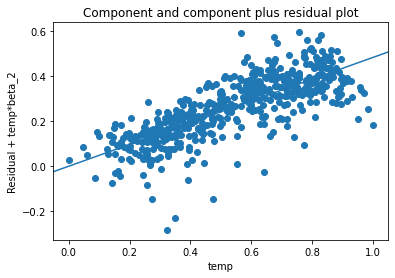

In [119]:
# Validating Linear Relationship
sm.graphics.plot_ccpr(lr_model19, 'temp')
plt.show()

The partial residual plot represents the relationship between the predictor and the dependent variable while taking into account all the other variables. As we can see in the above graph, the linearity is well respected.

#### 7.2 Validating Homoscedasticity

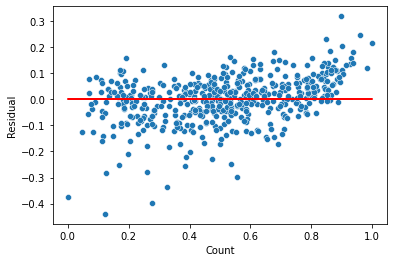

In [120]:
# The residuals have constant variance with respect to the dependent variable
y_train_pred = lr_model19.predict(X_train_sm)
sns.scatterplot(y_train,(y_train - y_train_pred))
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

As we can see in the above plot, Homoscedasticity is well respected since the variance of the residuals are almost constant.

#### 7.3 Validating Multi Colinearity

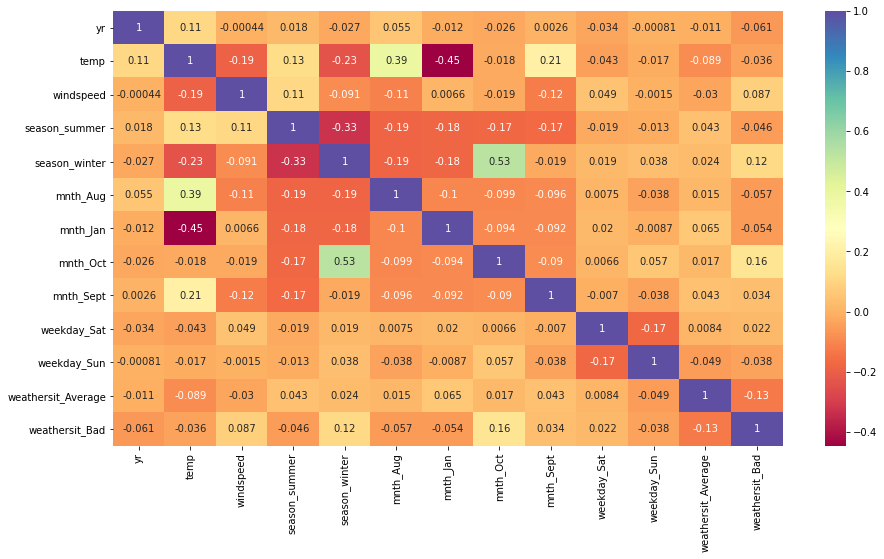

In [121]:
# Validating Multi Colinearity
plt.figure(figsize=(15,8))
sns.heatmap(X.corr(),annot=True, cmap='Spectral')
plt.show()

All variables have less than 0.56 correlation with eachother. Checking the VIF now.

In [122]:
print(vif)

              Features   VIF
1                 temp  5.27
2            windspeed  3.41
0                   yr  2.04
4        season_winter  2.00
3        season_summer  1.90
5             mnth_Aug  1.61
7             mnth_Oct  1.59
11  weathersit_Average  1.54
8            mnth_Sept  1.34
6             mnth_Jan  1.23
9          weekday_Sat  1.21
10         weekday_Sun  1.20
12      weathersit_Bad  1.10


Taking 10 as the maximum VIF permissible for this model, we decide on keeping these colmns based upon business assumptions.

#### 7.4 Independence of residuals 

In [123]:
# Autocorrelation refers to the fact that observations’ errors are correlated
# To verify that the observations are not auto-correlated, we can use the Durbin-Watson test. 
# The test will output values between 0 and 4. The closer it is to 2, the less auto-correlation there is between the various variables
# (0–2: positive auto-correlation, 2–4: negative auto-correlation)

print('The Durbin-Watson value for Model No.19 is',round(sm.stats.stattools.durbin_watson((y_train - y_train_pred)),4))

The Durbin-Watson value for Model No.19 is 2.0115


There is almost nill auto-correlation

#### 7.5 Normality of Errors

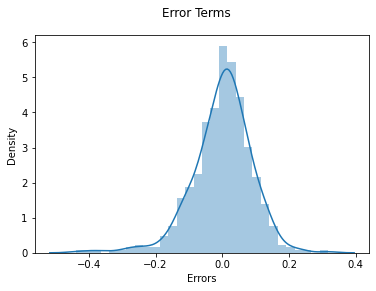

In [126]:
# Normality of Errors
y_train_pred = lr_model19.predict(X_train_sm)

# Ploting the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred))
fig.suptitle('Error Terms')                  
plt.xlabel('Errors')     
plt.show()

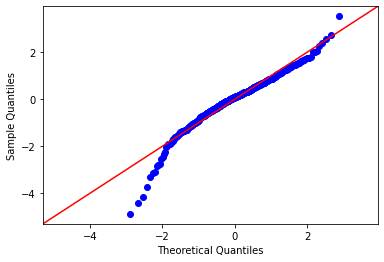

In [127]:
sm.qqplot((y_train - y_train_pred), fit=True, line='45')
plt.show()

### Step 8. Making Prediction

In [131]:
# Scaling the Test Dataset with the Scaler of the Training Set
cols = bikeSharingDataFrame_test.columns
bikeSharingDataFrame_test[cols] = scaler.transform(bikeSharingDataFrame_test[cols])

In [132]:
# Dividing into X_test and y_test
y_test = bikeSharingDataFrame_test.pop('cnt')
X_test = bikeSharingDataFrame_test

In [133]:
# Adding the constant column
X_test_m19 = sm.add_constant(X_test)
# Removing all the columns which has been removed from Model 19
X_test_m19 = X_test_m19.drop(['mnth_Dec','mnth_Nov','mnth_Mar','weekday_Wed',
                              'atemp','weekday_Thu','mnth_Jul','weekday_Tue',
                              'holiday','weekday_Mon','mnth_Jun','season_spring','days_old',
                              'mnth_May','mnth_Feb','weathersit_Good','hum','workingday'], axis=1)

In [134]:
# Making prediction using Model 19
y_test_pred = lr_model19.predict(X_test_m19)

### Step 9. Model Evaluation

In [135]:
print('The R-Squared score of the model for the predicted values is',round(r2_score(y_test, y_test_pred),2))
print('The Root Mean Squared Error of the model for the predicted values is',round(np.sqrt(mean_squared_error(y_test, y_test_pred)),4))
print('The Mean Absolute Error of the model for the predicted values is',mean_absolute_error(y_test, y_test_pred))

The R-Squared score of the model for the predicted values is 0.8
The Root Mean Squared Error of the model for the predicted values is 0.0981
The Mean Absolute Error of the model for the predicted values is 0.07463024398008186


In [136]:
# As asked in problem statement
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.7986582109858615

We can see that the equation of our best fitted line developed by Model 19 is:
$ cnt = 0.1628 + ( 0.2345  \times  yr - 0.0498  \times  windspeed + 0.0959 \times season Summer + 0.1115 \times season Winter + 0.0536 \times month Augest - 0.0473  \times month Janury + 0.0394 \times month October + 0.1135 \times month September + 0.0146 \times Saturday - 0.0437 \times Sunday - 0.0812 \times Average Weather - 0.2909 \times Bad Weather ) $

Since the bookings increase on good weather days with hotter temperature, the company must increase their bike availibilty and promotions during the summer months to further increase their booking count.

An R-Squared value of 0.8 on the test data signifies that the model is a very good predictor and 80% of the variance is captured by the model.It can be further improved by using other regression techniques like Random Forest.

### Step 10. Interepretation of results

#### Analysing the above model, the comapany should focus on the following features:
- Company should focus on expanding business during September.
- Based on previous data it is expected to have a boom in number of users once situation comes back to normal, compared to 2019.
- There would be less bookings during Light Snow or Rain, they could probably use this time to serive the bikes without having business impact.
- Booking is also less on a Windy day.
##### Hence when the situation comes back to normal, the company should come up with new offers for September as this is when business would be at its best.

#### _`Conclusion`_
Significant variables to predict the demand for shared bikes
- Temperature
- Season
- Windspeed
- Weather
- months(January, August, September, Oct)
- Year (2019)
- Sunday